# Decision Tree & Random Forest

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [21]:
import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file 

In [22]:
TitanicDf = pd.DataFrame(pd.read_csv('titanic-passengers.csv' , sep = ';'))
TitanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,78.542.000.000.000.000,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0,B71,S


## Preprocessing phase

### Finding the missing informations

In [23]:
TitanicDf.isnull().sum()*100/TitanicDf.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### we will replace the missing values in the 'Age' column with the median  and the 'Fare' with its mean:

In [24]:
TitanicDf['Age'].fillna(TitanicDf['Age'].median(),inplace=True)

TitanicDf['Fare']= pd.to_numeric(TitanicDf.Fare.str.replace('[^\d.]', ''), errors='coerce')
TitanicDf['Fare'].fillna(TitanicDf['Fare'].mean(),inplace=True)

#### dropping all the useless features

In [25]:
TitanicDf=TitanicDf.drop(['Name','Ticket','Cabin','Embarked','PassengerId'], axis = 1 ,inplace=False)

#### Transforming categorical data into numerical data

Our prediction model can not deal with categorical values that's why we will transform all of them into numerical ones.

In [26]:
encoder=LabelEncoder()

In [27]:
TitanicDf['Sex']=encoder.fit_transform(TitanicDf['Sex'])
TitanicDf['Survived']=encoder.fit_transform(TitanicDf['Survived'])

In [28]:
TitanicDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28.0,0,0,13.000000
1,0,3,1,25.0,0,0,7.650000
2,0,3,1,20.0,0,0,91.498847
3,0,3,0,29.0,0,4,21.075000
4,0,1,1,31.0,1,0,52.000000


In [29]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

#### features extraction

In [30]:
x = TitanicDf.drop(["Survived"], axis=1)
y = TitanicDf["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#### Models creation, fitting and evaluation

In [31]:
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


In [32]:
train_columns=['Pclass','Sex','Age','SibSp','Parch','Fare']

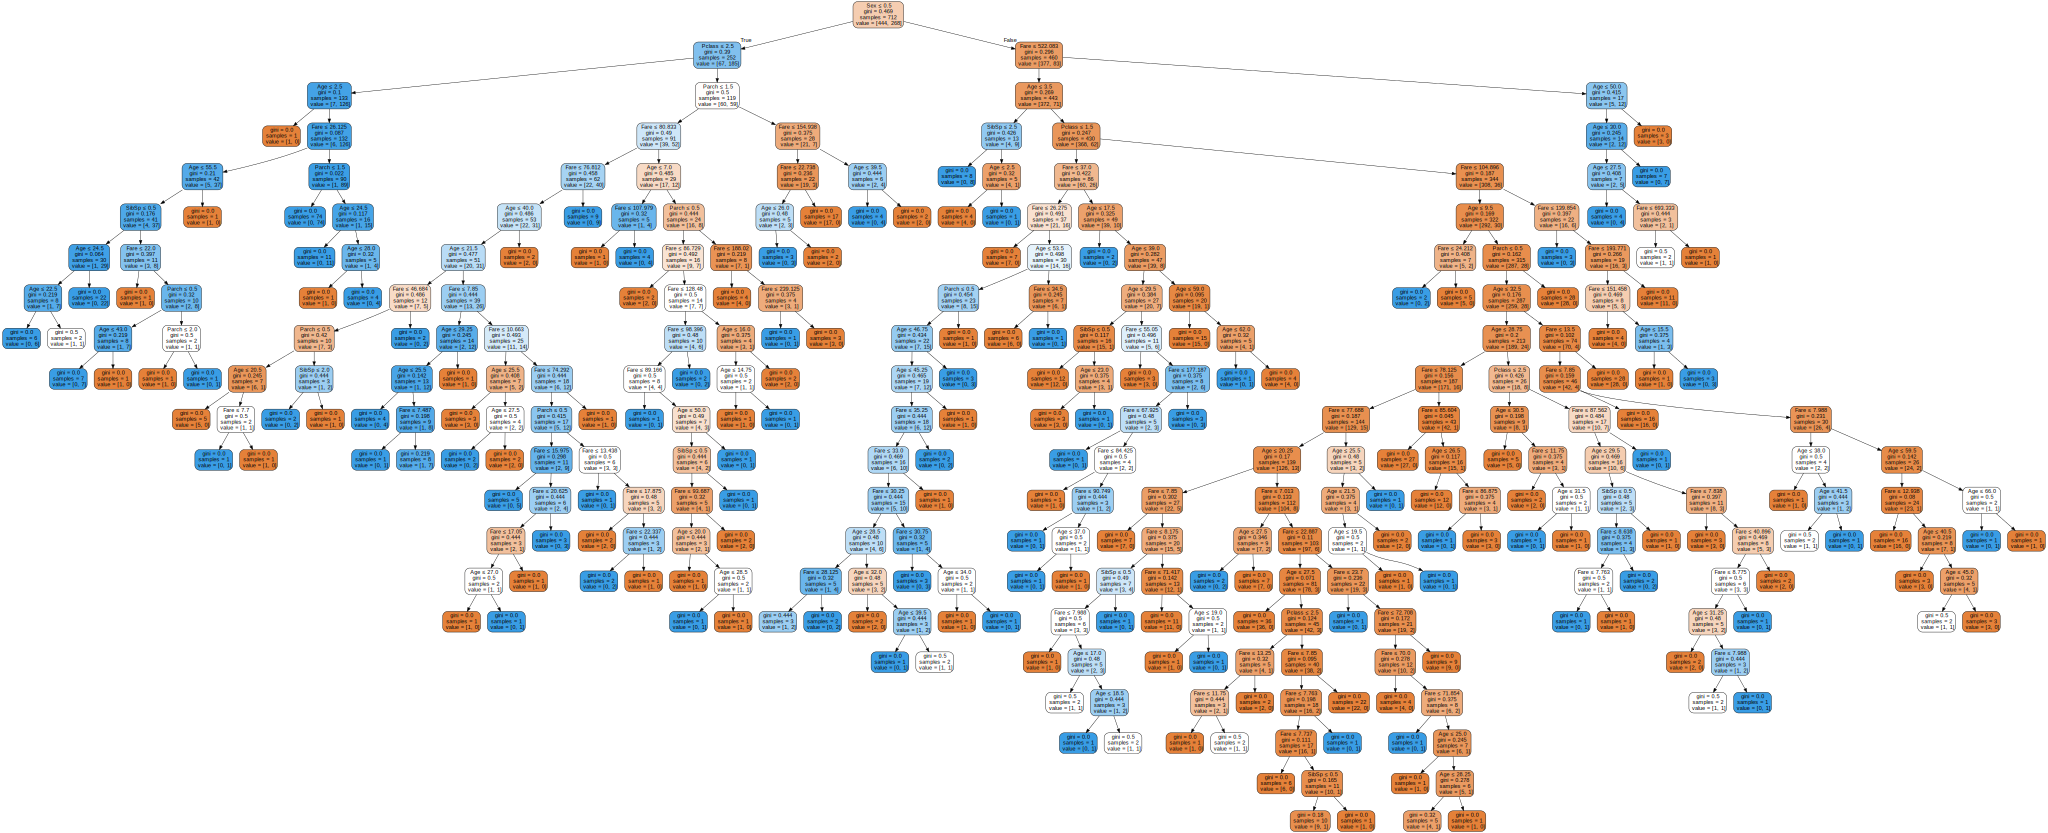

In [33]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
graph

Let's do a prediction : we will take as an exemple the passenger number 4 ( Male, Pclass : 1, Age=31, SibSp=1, Parch=0, Fare=52 )
Let's start: 
Sex<0.5 : False --> Fare<522 : True --> Age<3,5 : False --> Pclass<1.5 : True --> Fare<37 : False --> Age<17,5 : False --> Age<39 : True --> Age<29,5 : False --> Fare<55,5 : True 
This is the path of the passenger number 4 and from the prediction tree the passenger did not survived (the prob of his death is 1) and it's correct


#### The Puring Phase
The tree that we had up here is very complex and we need to make it more clear in order to avoid overfitting we will be shortening branches of our Tree, and this by by reducing the number of leaf nodes and reducing the depth of the tree.

In [15]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)

In [16]:
dtree.fit(x_train, y_train)   
y_pred=dtree.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7932960893854749


We can notice that after puring our tree the accuracy score had increased

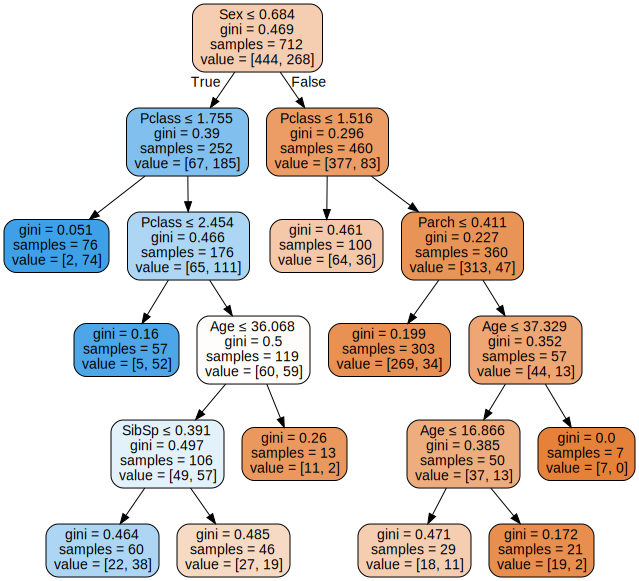

In [34]:
dot_data = tree.export_graphviz(dtree, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
graph

## Random forest
Now we will use a random forest in our previous dataset

In [35]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  

clf2=RandomForestClassifier(n_estimators=10)  
clf2.fit(x_train, y_train)  
y_pred=clf2.predict(x_test)  
print("Accuracy with 10 estimators:", metrics.accuracy_score(y_test, y_pred))  

Accuracy with 10 estimators: 0.8268156424581006


In [39]:
clf3=RandomForestClassifier(n_estimators=1000)  
clf3.fit(x_train, y_train)  
y_pred=clf3.predict(x_test)  
print("Accuracy with 1000 estimators:", metrics.accuracy_score(y_test, y_pred))  

Accuracy with 1000 estimators: 0.8324022346368715


The first random forest had 100 decision trees and the second one had 10000, that's 100 greater than the first while the accuracy did not change a lot.
From that we can conclude that the random forest are more accurate then the decision forest.